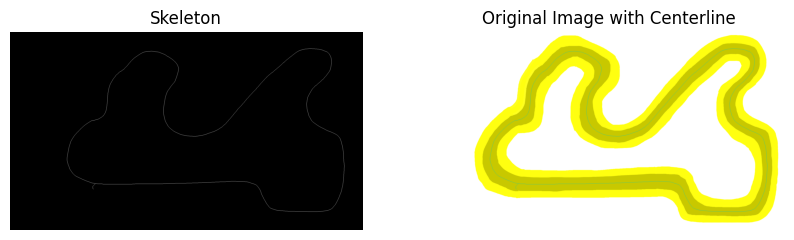

In [53]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.morphology import skeletonize

# Load the image
img_path = "testing_track4.png"
original_img = cv2.imread(img_path)
img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Define the color range for the track in RGB
lower_bound = np.array([190, 190, 0])  # adjusted lower bound for color detection
upper_bound = np.array([210, 210, 50])  # adjusted upper bound for color detection

# Create a mask to isolate the track
mask = cv2.inRange(img, lower_bound, upper_bound)

# Convert mask to boolean and skeletonize
skeleton = skeletonize(mask > 0)

# Overlay skeleton on the original image
skeleton_img = original_img.copy()
skeleton_img[skeleton] = [200, 200, 0]  # Applying the color (200, 200, 0) for the skeleton

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Skeleton")
plt.imshow(skeleton, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Original Image with Centerline")
plt.imshow(cv2.cvtColor(skeleton_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


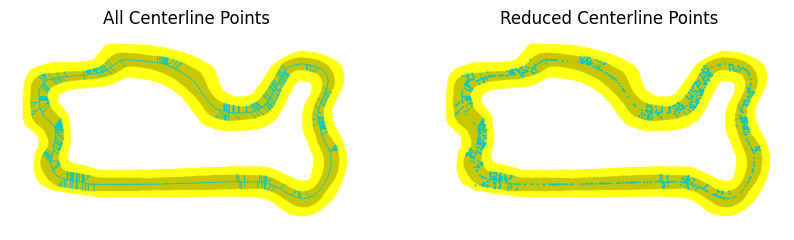

In [52]:
centerline_points = np.column_stack(np.where(skeleton))[:, ::-1]

# Draw these points on the original image
points_img = original_img.copy()
for point in centerline_points:
    cv2.circle(points_img, tuple(point), 2, (200, 200, 0), -1)

# Display the image with all points
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("All Centerline Points")
plt.imshow(cv2.cvtColor(points_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Randomly sample 1% of the points
reduced_points = centerline_points[np.random.choice(centerline_points.shape[0], int(len(centerline_points) * 0.1), replace=False)]

# Draw reduced points on a new image
reduced_points_img = original_img.copy()
for point in reduced_points:
    cv2.circle(reduced_points_img, tuple(point), 5, (200, 200, 0), -1)

# Display the image with reduced points
plt.subplot(1, 2, 2)
plt.title("Reduced Centerline Points")
plt.imshow(cv2.cvtColor(reduced_points_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()